In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import geoip2.database

In [2]:
CapURL="C:\\Users\\Aadith Sukumar\\Desktop\\CyberSec Project\\Network Analyzer\\WSTrialCapture.csv"

In [3]:
CapData=pd.read_csv(CapURL)
CapData.head(10)


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.1.21,172.64.155.188,TCP,55,10660 > 80 [ACK] Seq=1 Ack=1 Win=512 Len=1
1,2,0.000200,192.168.1.21,172.64.155.188,TCP,55,10677 > 80 [ACK] Seq=1 Ack=1 Win=516 Len=1
2,3,0.004170,172.64.155.188,192.168.1.21,TCP,66,80 > 10660 [ACK] Seq=1 Ack=2 Win=64 Len=0 SL...
3,4,0.004170,172.64.155.188,192.168.1.21,TCP,66,80 > 10677 [ACK] Seq=1 Ack=2 Win=62 Len=0 SL...
4,5,0.207930,192.168.1.21,108.159.1.92,TCP,55,10690 > 443 [ACK] Seq=1 Ack=1 Win=517 Len=1 ...
5,6,0.217748,108.159.1.92,192.168.1.21,TCP,66,443 > 10690 [ACK] Seq=1 Ack=2 Win=133 Len=0 ...
6,7,0.277697,192.168.1.21,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
7,8,0.359750,192.168.1.5,192.168.1.21,UDP,556,48533 > 63999 Len=514
8,9,0.843838,192.168.1.21,192.168.1.5,TCP,164,"19856 > 8009 [PSH, ACK] Seq=1 Ack=1 Win=507 ..."
9,10,0.843838,192.168.1.21,192.168.1.5,TCP,164,"20064 > 8009 [PSH, ACK] Seq=1 Ack=1 Win=513 ..."


In [4]:
#Taking a look at “sources” reveals which devices had the least/most number of communications

sources=CapData.groupby("Source").Source.count()
sources.sort_values()

Source
108.159.1.92       2
157.240.192.52     2
172.64.155.188     5
192.168.1.5        8
192.168.1.21      23
Name: Source, dtype: int64

In [5]:

dest=CapData.groupby("Destination").Destination.count()
dest.sort_values()

Destination
108.159.1.92        2
117.18.232.200      2
157.240.192.52      2
239.255.255.250     4
172.64.155.188      5
192.168.1.5         8
192.168.1.21       17
Name: Destination, dtype: int64

In [6]:
#If you investigate “protocols”, you’ll see a few HTTP types of communications. 
#As a security professional, you know that means information communicated is not encrypted. 
#Meaning, anyone can read it, so hopefully, there was nothing confidential!

protocol=CapData.groupby("Protocol").Protocol.count()
protocol.sort_values()

Protocol
TLSv1.2     2
SSDP        4
UDP         4
TCP        30
Name: Protocol, dtype: int64

</n><b>** build node graphs that represent a type of communication **</b>

In [7]:
network = nx.from_pandas_edgelist(CapData, source="Source", target="Destination", edge_attr=True)
network.nodes()

NodeView(('192.168.1.21', '172.64.155.188', '108.159.1.92', '239.255.255.250', '192.168.1.5', '117.18.232.200', '157.240.192.52'))

In [8]:
network.edges()

EdgeView([('192.168.1.21', '172.64.155.188'), ('192.168.1.21', '108.159.1.92'), ('192.168.1.21', '239.255.255.250'), ('192.168.1.21', '192.168.1.5'), ('192.168.1.21', '117.18.232.200'), ('192.168.1.21', '157.240.192.52')])

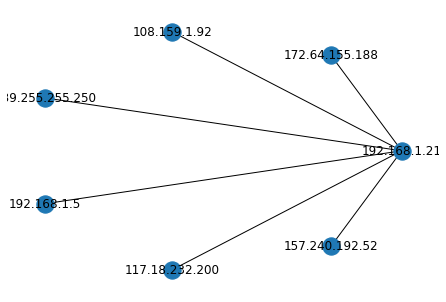

In [9]:
#display a network map based on the traffic
nx.draw_circular(network, with_labels=True)

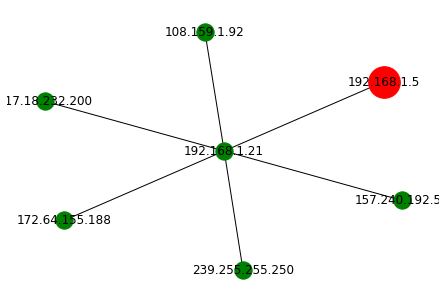

In [10]:
#create a color-coded map showing us which devices the malicious device communicated with.

suspect = "192.168.1.5"
pos=nx.spring_layout(network)
nx.draw(network, pos, node_color="green", node_size=300, with_labels=True)

options = {"node_size":1000, "node_color":"r"}
nx.draw_networkx_nodes(network, pos, nodelist=[suspect],**options)
plt.show()

In [161]:
#Seeing captured information of suspect flag address

CapData.loc[CapData["Source"]=="192.168.1.5"]

,No.,Time,Source,Destination,Protocol,Length,Info
7,8,0.359750,192.168.1.5,192.168.1.21,UDP,556,48533 > 63999 Len=514
10,11,0.855388,192.168.1.5,192.168.1.21,TCP,164,"8009 > 19856 [PSH, ACK] Seq=1 Ack=111 Win=14..."
11,12,0.855388,192.168.1.5,192.168.1.21,TCP,164,"8009 > 20064 [PSH, ACK] Seq=1 Ack=111 Win=14..."
17,18,1.372092,192.168.1.5,192.168.1.21,UDP,556,42514 > 63999 Len=514
21,22,2.400934,192.168.1.5,192.168.1.21,UDP,556,58637 > 63999 Len=514
23,24,3.422164,192.168.1.5,192.168.1.21,UDP,556,51939 > 63999 Len=514
36,37,5.867824,192.168.1.5,192.168.1.21,TCP,164,"8009 > 20064 [PSH, ACK] Seq=111 Ack=221 Win=..."
37,38,5.868432,192.168.1.5,192.168.1.21,TCP,164,"8009 > 19856 [PSH, ACK] Seq=111 Ack=221 Win=..."


<h4>GeoIP2 and finding location</h4>

In [162]:
#IF ADDRESS NOT FOUND ERROR --> they are reserved IPs 

reader = geoip2.database.Reader("C:\\Users\\Aadith Sukumar\\Desktop\\CyberSec Project\\Network Analyzer\\GeoLite2-Country.mmdb")
response = reader.country("128.101.101.101")
response.country.name

'United States'